In [68]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [69]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [70]:
#matplotlib 패키지 한글 깨짐 처리 시작
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [71]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [72]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/100000
data.rename(columns={'매출금액' : '매출금액(단위:십만원)'}, inplace=True)

In [73]:
data_e = data[data['품목대분류명'] == 'e상품/서비스']
grouped_C = pd.DataFrame(data_e['매출건수'].groupby(data_e['기준년월']).sum())
grouped_C

,매출건수
기준년월,
201903,475335
201909,379678
202003,613956
202009,749066
202103,686292


In [74]:
grouped_M = pd.DataFrame(data_e['매출금액(단위:십만원)'].groupby(data_e['기준년월']).sum())
grouped_M

,매출금액(단위:십만원)
기준년월,
201903,162485.04474
201909,137629.70433
202003,210014.15140
202009,290701.21990
202103,229093.43697


In [75]:
df_e = pd.merge(grouped_M, grouped_C, on = '기준년월');df_e

,매출금액(단위:십만원),매출건수
기준년월,,
201903,162485.04474,475335
201909,137629.70433,379678
202003,210014.15140,613956
202009,290701.21990,749066
202103,229093.43697,686292


In [76]:
#rng : 먼저 기간 만들어주기
rng = pd.date_range('2019.03', periods=5, freq='6M')
rng

DatetimeIndex(['2019-03-31', '2019-09-30', '2020-03-31', '2020-09-30',
               '2021-03-31'],
              dtype='datetime64[ns]', freq='6M')

In [77]:
#일일히 값 지정해줌.
df_e.set_index(rng, inplace= True)

In [78]:
df_e_upsample = df_e.resample('M').mean()

In [79]:
#(1-1) 앞의 값으로 뒤의 결측값 채우기 (선형회귀로 값 채우기)
# (1) 선형회귀로 값 채우기

df_e_upsample=df_e_upsample.interpolate(method='values')
df_e_upsample=df_e_upsample.reset_index().rename(columns={"index":"기준년월"})


In [80]:
#일수 제거
df_e_upsample["기준년월"] = df_e_upsample["기준년월"].astype(str).str[:-3]

<AxesSubplot:>

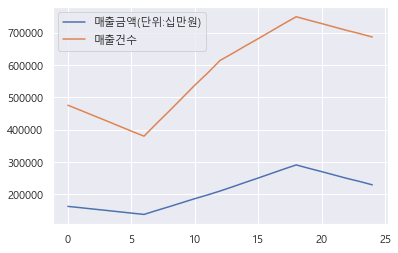

In [81]:
df_e_upsample.interpolate(method='values').plot()

In [ ]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.barplot(x = '기준년월', y = '매출건수', data = df_e_upsample)

In [ ]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.barplot(x = '기준년월', y = '매출금액(단위:십만원)', data = df_e_upsample)

In [82]:
data2 = pd.read_excel(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\소비지수\소비평가지수.xlsx')

In [83]:
df_c =pd.DataFrame(data2)

In [84]:
#df_f_upsample과 df_c 합치기
df_c=df_c.join(df_e_upsample)

In [85]:
#기준년월 column 제거
df_c=df_c.drop(['기준년월'],axis=1)
df_c

,일자,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,온라인쇼핑몰 e상품서비스 (단위:백만원),온라인쇼핑몰 식품 (단위:백만원),온라인쇼핑몰 전자 (단위:백만원),온라인쇼핑몰 여가스포츠 (단위:백만원),경제심리지수(원계열),...,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스,매출금액(단위:십만원),매출건수
0,201903,100.5,NaN,NaN,0.2,2586885,2000184,1857380,1887506,96.6,...,103.01,107.58,99.30,97.25,101.70,105.19,109.63,108.38,162485.044740,475335.000000
1,201904,102.4,NaN,NaN,0.7,2587805,2031463,1603396,1956177,97.6,...,102.76,108.06,100.78,97.52,102.74,105.25,109.80,108.62,158410.398771,459653.524590
2,201905,98.7,NaN,NaN,0.7,2802641,2139279,1736273,2102796,94.3,...,102.84,106.95,103.06,97.32,102.32,105.34,110.01,109.00,154199.931270,443449.333333
3,201906,98.4,NaN,NaN,0.7,2854338,2084469,1566999,2095443,95.0,...,102.90,106.67,103.31,97.17,101.29,105.39,110.11,108.73,150125.285301,427767.857923
4,201907,96.9,NaN,NaN,0.5,3075567,2204550,1673541,2258515,92.2,...,101.47,107.65,102.58,96.76,102.81,105.39,110.35,108.81,145914.817800,411563.666667
5,201908,93.5,NaN,NaN,0.5,3268142,2454057,1646430,2250542,91.5,...,101.55,107.28,102.59,97.13,103.65,105.42,110.64,108.77,141704.350299,395359.475410
6,201909,97.9,NaN,NaN,0.5,2843301,2463193,1532039,1880731,94.1,...,103.18,106.53,102.99,97.40,102.54,103.58,110.09,108.77,137629.704330,379678.000000
7,201910,99.5,NaN,NaN,0.9,3030595,2417261,1645310,2100003,93.5,...,103.34,107.80,103.60,97.33,102.90,103.72,110.27,108.85,149891.550555,419364.437158
8,201911,101.7,NaN,NaN,0.9,3235373,2550984,1885360,2121624,94.3,...,103.33,106.96,103.12,96.57,101.20,103.77,110.29,108.92,161757.853353,457770.666667
9,201912,101.3,NaN,NaN,0.9,3388613,2617653,1768269,2164971,95.1,...,103.50,107.47,103.58,96.52,100.52,103.83,110.45,108.94,174019.699578,497457.103825
